### Importación de librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
dataframe = pd.read_csv(r"data_resampled.csv",sep=',')
dataframe.head(10)

,Application order,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Mother's qualification: Basic education 3rd cycle,Mother's qualification: Basic education 1st cycle,Mother's qualification: Basic Education 2nd Cycle,Father's qualification: Others,Father's qualification: Secondary education,Father's qualification: Higher education,Father's qualification: Basic education 3rd cycle,Father's qualification: Basic education 1st cycle,Father's qualification: Basic Education 2nd Cycle,Target
0,5,1,122.0,127.3,1,0,1,1,0,20,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,1,1,160.0,142.5,1,0,0,1,0,19,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
2,5,1,122.0,124.8,1,0,0,1,0,19,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,2,1,122.0,119.6,1,0,1,0,0,20,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,1,0,100.0,141.5,0,0,1,0,0,45,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
5,1,0,133.1,114.8,0,1,1,1,0,50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
6,1,1,142.0,128.4,1,0,1,0,1,18,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
7,4,1,119.0,113.1,1,0,0,1,0,22,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
8,3,1,137.0,129.3,0,0,1,0,1,21,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
9,1,1,138.0,123.0,1,1,0,0,0,18,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


### Resumen estadístico de los datos

In [4]:

dataframe.describe()

,Application order,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,...,Mother's qualification: Basic education 3rd cycle,Mother's qualification: Basic education 1st cycle,Mother's qualification: Basic Education 2nd Cycle,Father's qualification: Others,Father's qualification: Secondary education,Father's qualification: Higher education,Father's qualification: Basic education 3rd cycle,Father's qualification: Basic education 1st cycle,Father's qualification: Basic Education 2nd Cycle,Target
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,...,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,1.640299,0.867910,132.272836,126.435254,0.481493,0.085373,0.845224,0.292985,0.181791,23.110896,...,0.214122,0.231049,0.121720,0.063602,0.207904,0.082342,0.214952,0.274929,0.156271,1.044776
std,1.210069,0.338613,12.785551,14.180613,0.499695,0.279457,0.361718,0.455166,0.385701,7.407192,...,0.387212,0.402324,0.309102,0.231818,0.382588,0.258242,0.387925,0.423772,0.343954,0.836416
min,0.000000,0.000000,95.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,124.000000,117.479396,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,133.000000,125.419398,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,1.000000,140.000000,134.300000,1.000000,0.000000,1.000000,1.000000,0.000000,25.000000,...,0.159761,0.308194,0.000000,0.000000,0.112618,0.000000,0.185260,0.702766,0.000000,2.000000
max,9.000000,1.000000,190.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


### Visualización de los datos

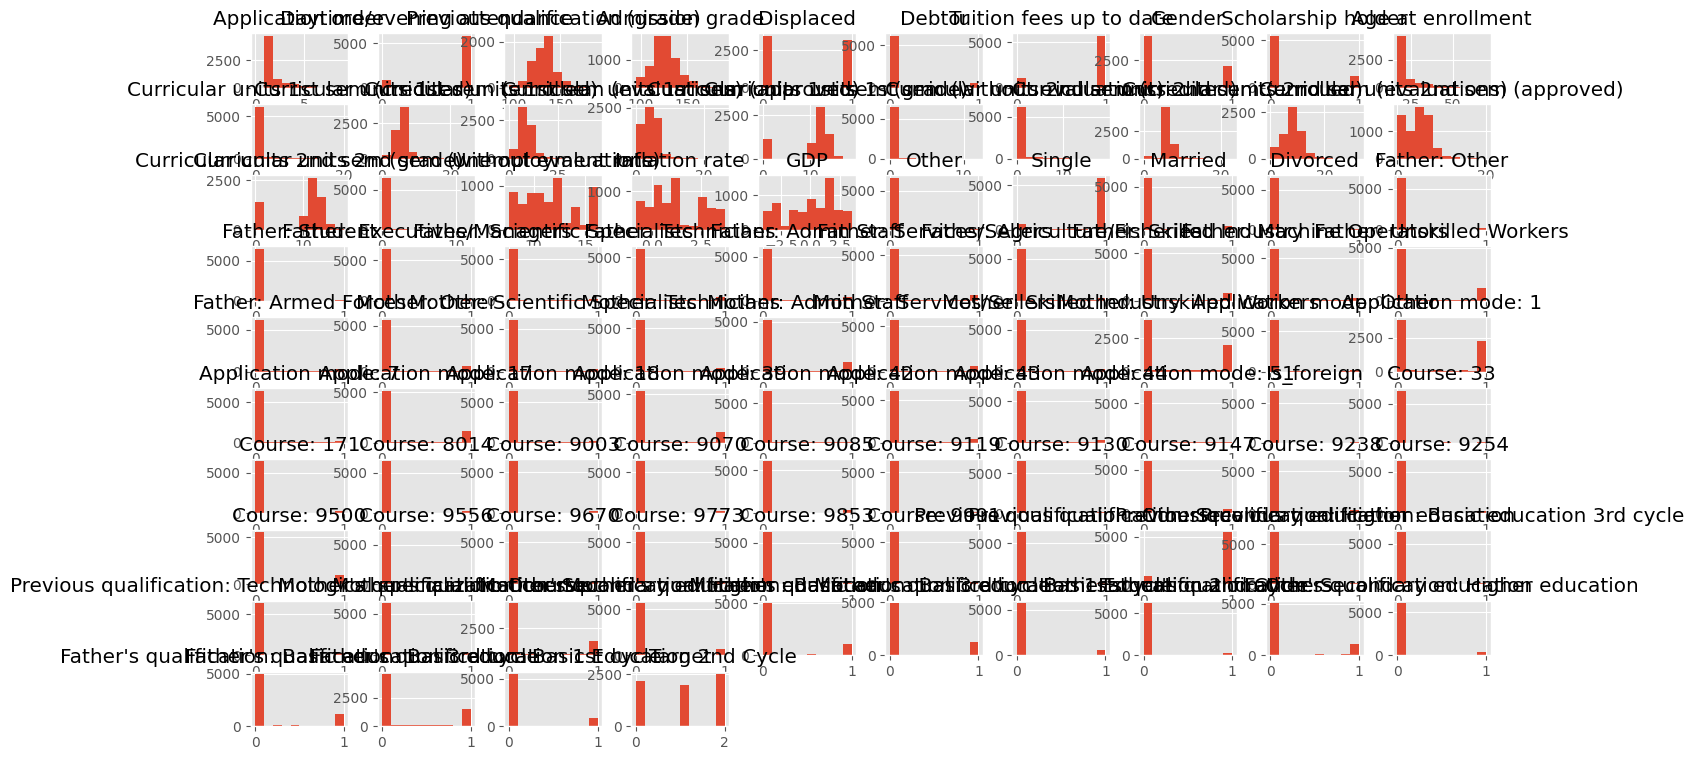

In [5]:

dataframe.hist()
plt.show()

### Preparar las entradas

In [6]:
X = dataframe.drop(columns=['Target'])
y = dataframe['Target']

### Codificar variables categóricas

In [7]:
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

### Separar datos para el entrenamiento y para la prueba del modelo

In [8]:
# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)


### Escalar datos

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Aplicar algoritmo

C:\Users\kitty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\kitty\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^

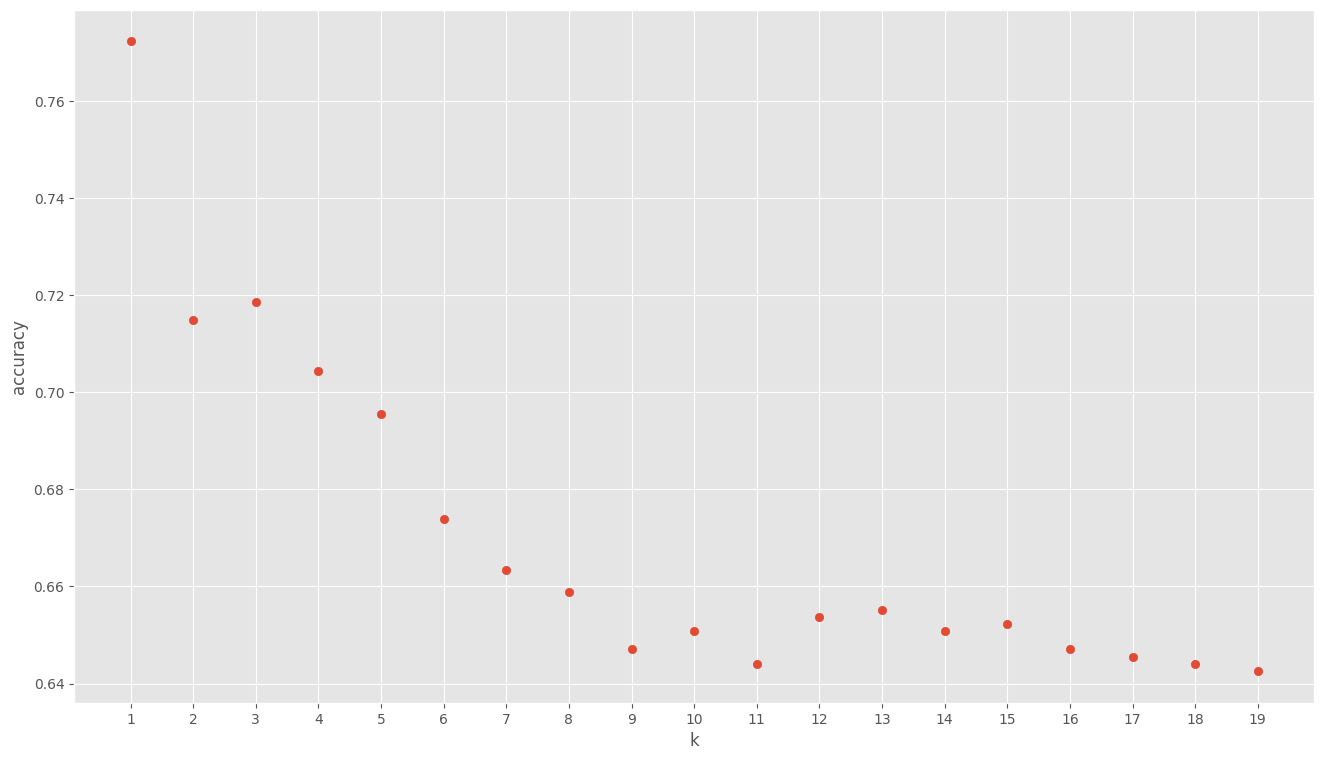

Mejor valor de k: 1 con accuracy: 0.77


In [10]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Buscar el mejor valor de k
k_range = range(1, 20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Visualizar resultados
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks(k_range)
plt.show()

# Obtener el mejor valor de k
best_k = k_range[scores.index(max(scores))]
print(f"Mejor valor de k: {best_k} con accuracy: {max(scores):.2f}")


In [11]:
from sklearn.neighbors import KNeighborsClassifier

 
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.77


### Ver la precisión del modelo

Confirmemos la precisión viendo la Confusión Matrix y el Reporte sobre el conjunto de test, que nos detalla los aciertos y fallos

In [12]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# Visualizar la matriz de confusión
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 7))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
# Visualizar los errores
errors = (y_test != pred)
plt.figure(figsize=(10, 7))
plt.scatter(X_test[errors, 0], X_test[errors, 1], c='red', label='Errors')
plt.scatter(X_test[~errors, 0], X_test[~errors, 1], c='blue', label='Correct')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Errors in K-NN Classification')
plt.legend()
plt.show()


[[334  54  54]
 [ 11 365  28]
 [ 49 109 336]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       442
           1       0.69      0.90      0.78       404
           2       0.80      0.68      0.74       494

    accuracy                           0.77      1340
   macro avg       0.78      0.78      0.77      1340
weighted avg       0.78      0.77      0.77      1340



NameError: name 'le' is not defined

<Figure size 1000x700 with 0 Axes>

### GRÁFICO

# PREDICCIONES

In [13]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Cargar nuevo dataset
nuevo_df = pd.read_csv("nuevo_estudiante.csv", sep=",")

# Separar características y etiquetas
X_nuevo = nuevo_df.drop(columns=['Target'])
X_nuevo = X_nuevo.fillna(X_nuevo.mean(numeric_only=True))

# Aplicar el mismo escalado que se usó con X_train
# Asegúrate de que 'scaler' ya esté definido
# Si 'scaler' no está definido, puedes volver a crear el objeto MinMaxScaler
scaler = MinMaxScaler()
X_nuevo = scaler.fit_transform(X_nuevo)  # Asegúrate de que 'scaler' ya esté definido

# Crear y entrenar el modelo con el mejor k (por si clf no está ya entrenado)
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_train, y_train)  # Asegúrate de tener X_train e y_train listos

# Obtener predicciones de probabilidad
probs = clf.predict_proba(X_nuevo)

# Mostrar resultados por estudiante con sus probabilidades
for i, prob in enumerate(probs):
    print(f"\nEstudiante {i+1}:")
    for clase, p in zip(clf.classes_, prob):
        print(f"  - {clase}: {p:.2f} de probabilidad")




Estudiante 1:
  - 0: 0.00 de probabilidad
  - 1: 0.00 de probabilidad
  - 2: 1.00 de probabilidad

Estudiante 2:
  - 0: 1.00 de probabilidad
  - 1: 0.00 de probabilidad
  - 2: 0.00 de probabilidad

Estudiante 3:
  - 0: 1.00 de probabilidad
  - 1: 0.00 de probabilidad
  - 2: 0.00 de probabilidad

Estudiante 4:
  - 0: 1.00 de probabilidad
  - 1: 0.00 de probabilidad
  - 2: 0.00 de probabilidad

Estudiante 5:
  - 0: 0.00 de probabilidad
  - 1: 1.00 de probabilidad
  - 2: 0.00 de probabilidad

Estudiante 6:
  - 0: 1.00 de probabilidad
  - 1: 0.00 de probabilidad
  - 2: 0.00 de probabilidad

Estudiante 7:
  - 0: 0.00 de probabilidad
  - 1: 1.00 de probabilidad
  - 2: 0.00 de probabilidad

Estudiante 8:
  - 0: 1.00 de probabilidad
  - 1: 0.00 de probabilidad
  - 2: 0.00 de probabilidad

Estudiante 9:
  - 0: 0.00 de probabilidad
  - 1: 1.00 de probabilidad
  - 2: 0.00 de probabilidad

Estudiante 10:
  - 0: 0.00 de probabilidad
  - 1: 1.00 de probabilidad
  - 2: 0.00 de probabilidad


               Dropout  Enrolled  Graduate
Estudiante                                
Estudiante 1       0.0       0.0       1.0
Estudiante 2       1.0       0.0       0.0
Estudiante 3       1.0       0.0       0.0
Estudiante 4       1.0       0.0       0.0
Estudiante 5       0.0       1.0       0.0
Estudiante 6       1.0       0.0       0.0
Estudiante 7       0.0       1.0       0.0
Estudiante 8       1.0       0.0       0.0
Estudiante 9       0.0       1.0       0.0
Estudiante 10      0.0       1.0       0.0


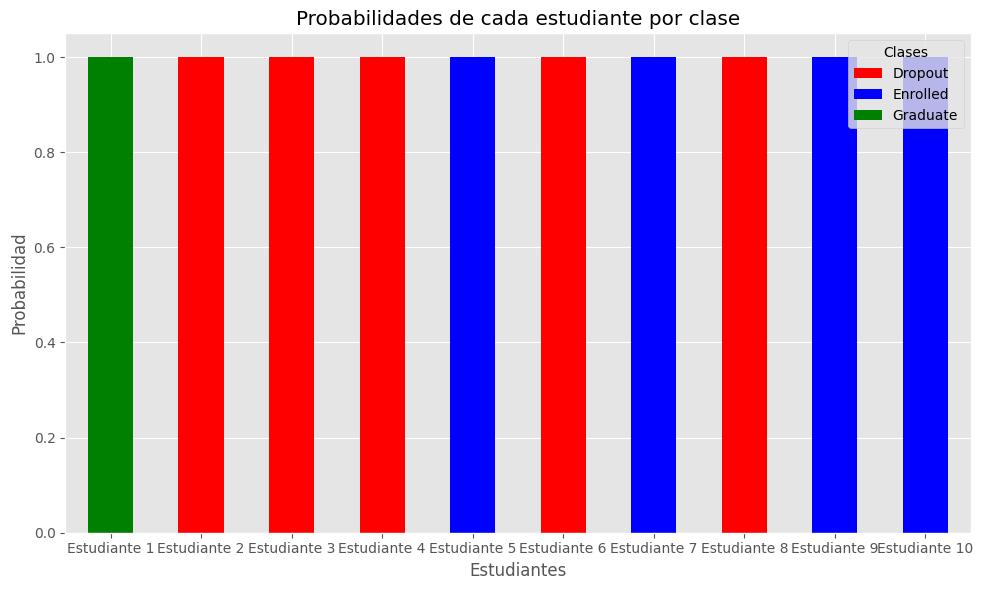

In [17]:
#hacer tabla de resultados y que no se vea 0 1 y 2, sino dropout, graduado y tal
# Crear un DataFrame para mostrar los resultados
resultados_df = pd.DataFrame(probs, columns=clf.classes_)
resultados_df['Estudiante'] = [f"Estudiante {i+1}" for i in range(len(resultados_df))]
resultados_df = resultados_df[['Estudiante'] + list(clf.classes_)]
resultados_df = resultados_df.rename(columns={0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'})
resultados_df = resultados_df.set_index('Estudiante')
print(resultados_df)





# Crear un gráfico de barras para visualizar cantidad de estudiantes por clase
fig=plt.figure(figsize=(10, 6))
resultados_df.plot(kind='bar', stacked=True, color=['red', 'blue', 'green'], ax=fig.gca())
plt.title('Probabilidades de cada estudiante por clase')
plt.xlabel('Estudiantes')
plt.ylabel('Probabilidad')
plt.xticks(rotation=0)
plt.legend(title='Clases')
plt.tight_layout()
plt.show()

### Gráfico

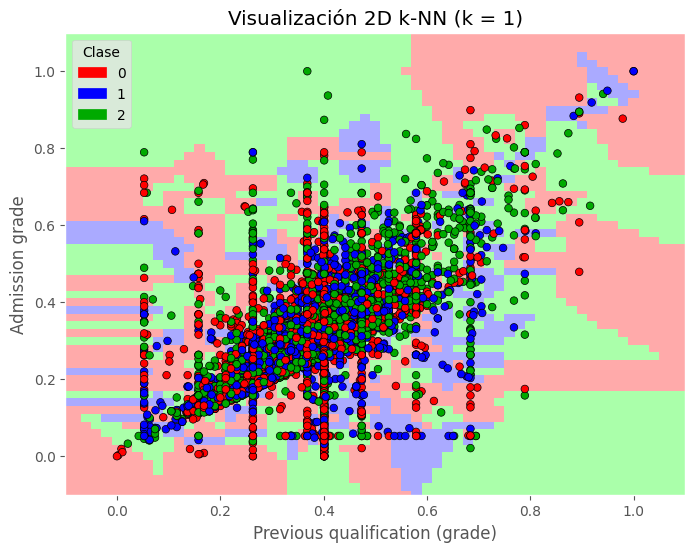

In [ ]:

# Select only the relevant features for training and testing
X1 = dataframe[['Previous qualification (grade)', 'Admission grade']].copy()

# Encode the target variable (Graduate, Dropout, Enrolled)
le = LabelEncoder()
y = le.fit_transform(dataframe['Target'])  # Now y will be 0, 1, or 2

# Split the data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.2, random_state=0)

# Scale the numerical features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.transform(X_test1)

# Define the classifier with the best value of k
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_train_scaled, y_train)

# Visualization in 2D
h = .02
x_min, x_max = X_train_scaled[:, 0].min() - 0.1, X_train_scaled[:, 0].max() + 0.1
y_min, y_max = X_train_scaled[:, 1].min() - 0.1, X_train_scaled[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = le.transform(Z)  # Encode string labels into numerical values
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00AA00'])

plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
# Encode the target labels into numerical values for the 'c' argument
y_train_encoded = le.transform(y_train)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_encoded, cmap=cmap_bold, edgecolor='k', s=30)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Visualización 2D k-NN (k = {best_k})")
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Admission grade')

labels = le.classes_
legend_handles = [mpatches.Patch(color=cmap_bold(i), label=label) for i, label in enumerate(labels)]
plt.legend(handles=legend_handles, title="Clase")

plt.show()

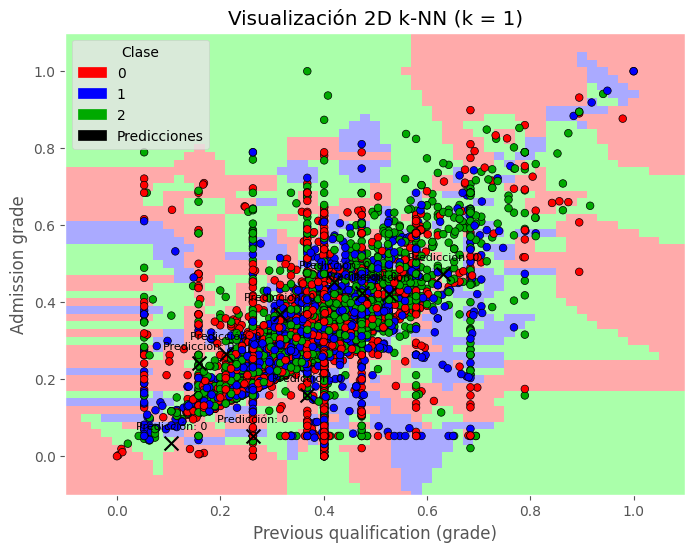

In [ ]:
#dibujar en el plot anterior los puntos predichos

# Plot
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#00AA00'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')
# Encode the target labels into numerical values for the 'c' argument
y_train_encoded = le.transform(y_train)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train_encoded, cmap=cmap_bold, edgecolor='k', s=30)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f"Visualización 2D k-NN (k = {best_k})")
plt.xlabel('Previous qualification (grade)')
plt.ylabel('Admission grade')

# Añadir los 5 puntos predichos (usando solo las dos columnas relevantes)
X_nuevo_plot = nuevo_df[['Previous qualification (grade)', 'Admission grade']]
X_nuevo_scaled = scaler.transform(X_nuevo_plot)
plt.scatter(X_nuevo_scaled[:, 0], X_nuevo_scaled[:, 1], c='black', marker='x', s=100, label='Predicciones')
plt.legend(handles=legend_handles + [mpatches.Patch(color='black', label='Predicciones')], title="Clase")
#añadir la leyenda de si se graduó, si se inscribió o si abandonó
predicciones_nuevo_labels = le.inverse_transform(predicciones_nuevo)
predicciones_nuevo_labels = [f"Predicción: {label}" for label in predicciones_nuevo_labels]
for i, label in enumerate(predicciones_nuevo_labels):
    plt.annotate(label, (X_nuevo_scaled[i, 0], X_nuevo_scaled[i, 1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.show()